# Yksinkertainen esimerkk K-means algoritmin käytöstä

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


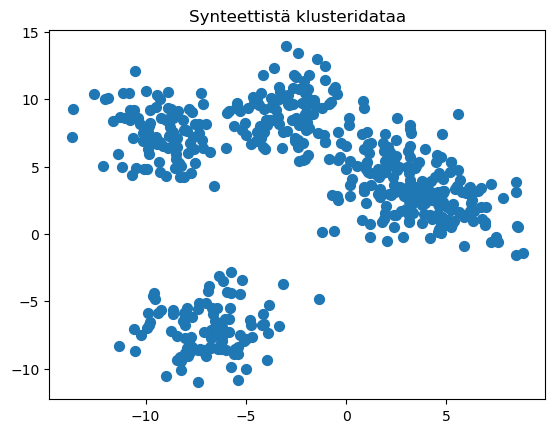

In [2]:
# Käytetään sklearn luomaa synteettista dataa esimerkkiin 

X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.8, random_state=42)

# Piirretään data pisteet
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title(f"Synteettistä klusteridataa")
plt.show()

K-Means algoritmissa on keskeistä, miten monta klusteria kokeillaan löytää datasta. Tämäkin on eräs optimointiongelma joka on haastavampi oikealla datalla "oikeassa maailmassa". 
Alla olevassa koodissa loopin sisällä testataan mahdollisten klustereiden määrään 1-10 välillä ja napataan parhaan tuloksen antava talteen.

In [3]:
num_clusters = range(1,11)
results = []
for num in num_clusters:

    kmeans = KMeans(n_clusters=num, random_state=42, n_init = 'auto')
    kmeans.fit(X)
    results.append(kmeans.inertia_)

Piirretään kuvaaja elbow-menetelmälle jotta voidaan tarkastella "elbow" kohtaa mikä olisi optimaallinen klusterien määrä. Eli se kohta missä klusterien määrän lisääminen ei enää vaikuta inertiaan suuresti. Inertia on kunkin löydetyn klusterin pisteiden etäisyys keskipisteestä. 

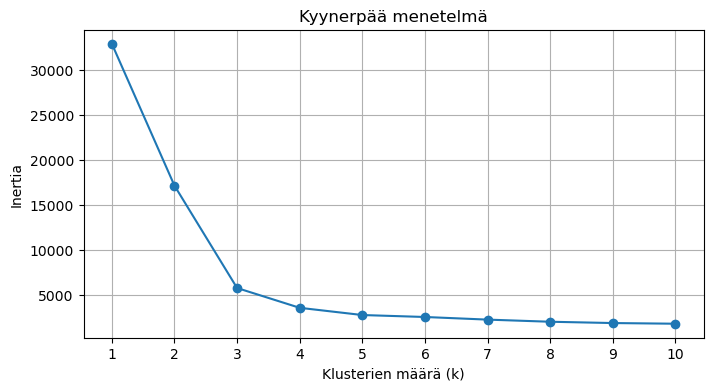

In [4]:

plt.figure(figsize=(8, 4))
plt.plot(num_clusters, results, marker='o')
plt.title("Kyynerpää menetelmä")
plt.xlabel("Klusterien määrä (k)")
plt.ylabel("Inertia")
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

Kuvaajasta voisi olettaa, että 4-6 välillä olisi optimi määrä klustereita. Kokeillaan miltä nämä eri määrät näyttää kuvaajissa. Joten tehdään funktio tätä tarkastelua varten.

In [5]:
def plot_kmeans_clusters(X, num_clusters):
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42,  n_init = 'auto')
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X) # klusterit joihin kukin piste kuuluu joita voidaan käyttää värittämiseen    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_ # klusterien keskipisteet
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(f"Klusterien määrä: {num_clusters}")
    plt.show()

Ja lopuksi katsellaan eri klusteri määrien antamia tuloksia

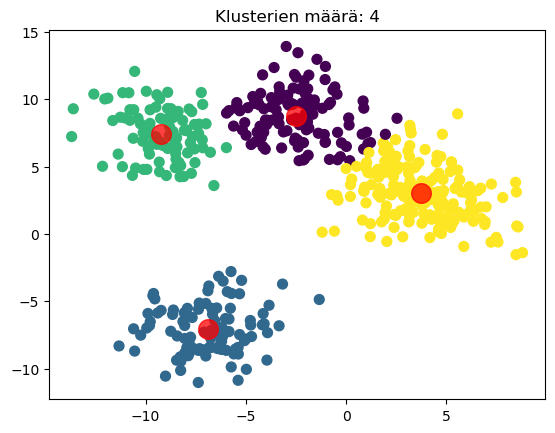

In [6]:
plot_kmeans_clusters(X, 4)

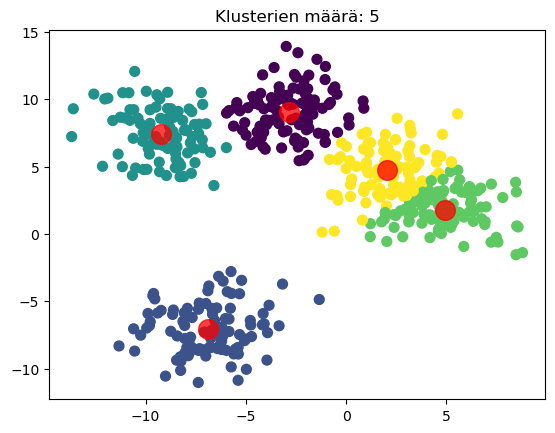

In [7]:
plot_kmeans_clusters(X, 5)

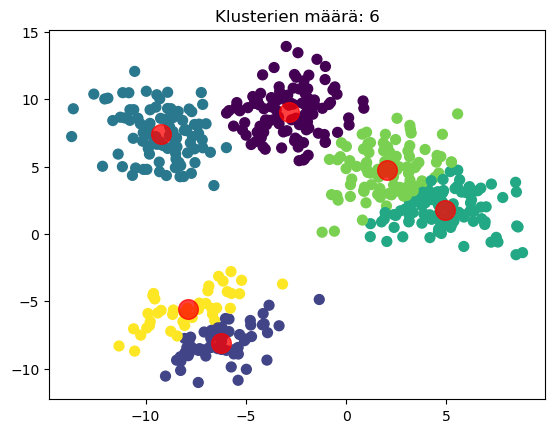

In [8]:
plot_kmeans_clusters(X, 6)